## Lecture 2: Computing the Adjoint Gradient

This lecture introduces the mathematics of the adjoint method and implements a simple adjoint gradient in Tidy3D, which is compared against a gradient found with finite difference.

We start by importing the packages we need, including Tidy3D.

In [1]:
import matplotlib.pylab as plt
import numpy as np

import tidy3d as td
import tidy3d.web as web

## Set up

First we set up our toy problem. 

We assume there is a dielectric recangle illuminated by a point dipole from the left.

We'll also add a monitor to measure the field at a point to the right of the box.

Ourn design objective will be to maximize the electric intensity at this point.


In [2]:
wavelength = 2.0 # um
freq0 = td.C_0 / wavelength
fwidth = freq0/10

# size of simulation domain
Lx = 2.5 * wavelength
Ly = 2.5 * wavelength

# size of rectangle
lx = 1.0 * wavelength
ly = 1.0 * wavelength

# grid size
dl = wavelength / 50

# relative permittivity of box
eps_box = 2.0

# x positions of the source and monitor
pos_src = - 0.4 * (Lx/2 + lx/2)
pos_mnt = + 0.6 * (Lx/2 + lx/2)

In [3]:
# the dielectric box
box = td.Structure(
    geometry=td.Box(size=(lx, ly, td.inf)),
    medium=td.Medium(permittivity=eps_box),
)

# point dipole source
src = td.PointDipole(
    center=(pos_src, -0.5, 0),
    polarization='Ez',
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
)

# monitor to visualize fields in the entire domain
mnt = td.FieldMonitor(
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='field',
    fields=('Ez',)
)

# monitor to specifically measure the fields at the location of the objective
mnt_objective = td.FieldMonitor(
    size=(0,0,0),
    center=(pos_mnt, 0.5, 0),
    freqs=[freq0],
    fields=('Ez',),
    name='measure',
)

# put everything together into a simulation
sim = td.Simulation(
    size=(Lx, Ly, 0),
    structures=[box],
    sources=[src],
    monitors=[mnt, mnt_objective],
    boundary_spec=td.BoundarySpec.pml(x=True, y=True, z=False),
    run_time=100.0/fwidth,
    grid_spec=td.GridSpec.uniform(dl=dl)
)

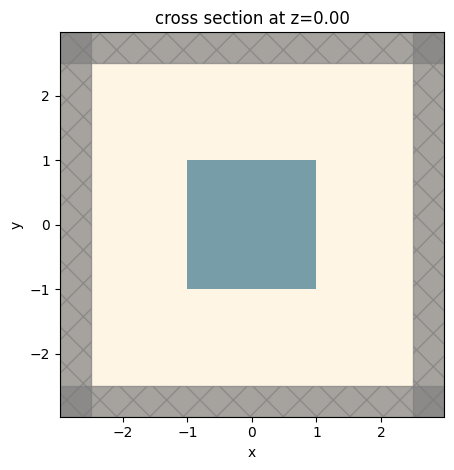

In [4]:
# plot the domain
ax = sim.plot(z=0, monitor_alpha=0.1)
plt.savefig('img/sim_orig_plot.png')
plt.show()

In [5]:
# run the simulation
sim_data = web.run(sim, task_name='orig', path='data/sim_data_orig.hdf5')

[11:24:02] Created task 'orig' with task_id 'fdve-f1f71106-032b-43be-ac97-c9a53344819av1'.            ]8;id=988406;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=933822;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=434968;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=898562;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=954312;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=196634;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\taskId]8;;\]8;id=954312;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\=]8;;\]8;id=175373;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\fdve]8;;\]8;id=954312;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\-f1f71106-032b-43be-ac97-c9a53344819]8;;\              
           ]8;id=954312;https://tidy3d.simulation.cloud/workbench?taskId=fdve-f1f71106-032b-43be-ac97-c9a53344819av1\av1']8;;\.                                                                                                   

Output()

[11:24:04] status = queued                                                                            ]8;id=963172;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=678126;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#322\322]8;;\

Output()

[11:24:10] status = preprocess                                                                        ]8;id=119892;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=801085;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#316\316]8;;\

[11:24:17] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=611267;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=201682;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#339\339]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=532451;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=23705;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#343\343]8;;\

           running solver                                                                             ]8;id=289905;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=981023;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#353\353]8;;\

Output()

[11:24:23] early shutoff detected, exiting.                                                           ]8;id=895338;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=515202;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#367\367]8;;\

           status = postprocess                                                                       ]8;id=417328;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=362240;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#384\384]8;;\

Output()

[11:24:29] status = success                                                                           ]8;id=921942;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=748264;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#391\391]8;;\

Output()

[11:24:30] loading SimulationData from data/sim_data_orig.hdf5                                        ]8;id=107754;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=235591;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

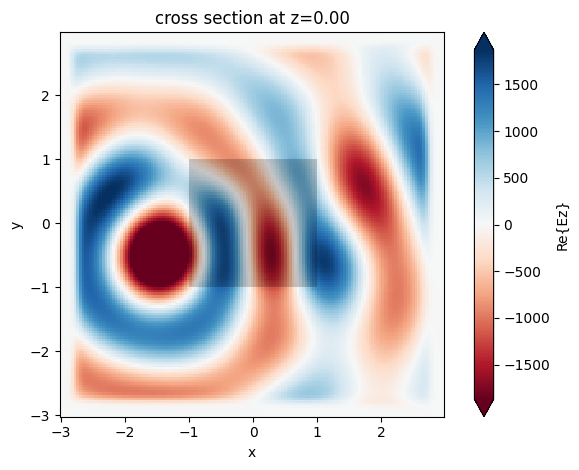

In [6]:
# visualize the fields
ax = sim_data.plot_field(field_monitor_name='field', field_name='Ez', val='real')
plt.savefig('img/sim_orig_fields.png')
plt.show()

## Objective function

Next, we will introduce our objective function, which computes the field intensity at the point to the right of the box.

For convenience, we'll package this as a couple functions that accept the simulation data. 

This makes things cleaner for when we want to re-compute this later.

In [7]:
def measure_amplitude(sim_data: td.SimulationData) -> complex:
    """How to post process a SimulationData object to give the intensity at the measurement point."""
    field_data = sim_data['measure']
    ez = field_data.Ez
    return dl**3 * complex(ez)
    
def measure_intensity(sim_data: td.SimulationData) -> float:
    """How to post process a SimulationData object to give our objective function value."""
    amplitude = measure_amplitude(sim_data)
    return abs(amplitude)**2


In [8]:
print(f'intensity = {measure_intensity(sim_data):.5f}')

intensity = 0.01088


## Adjoint Simulation

As mentioned, our adjoint simulation uses a source that is given by the partial derivative of our objective funciton with respect to the electric fields.

Our objective function involves measuring Ez at the `mnt_pos` and then squaring the absolute value.

If we write the measurement position as vector $m$ and the `Ez` as $e$, then our objective can be written as 

$$ J(e) = |m^T e|^2 = (m^T e) (m^T e)^{*}$$

Taking the derivative of $J$ with respect to a design parameter $p$ and respecting the complex-valued nature of $e$ by taking the regular and complex conjugate parts separately, we get:

$$ \frac{dJ}{dp} = \frac{\partial J}{\partial e} \frac{de}{dp} + \frac{\partial J}{\partial e^*} \frac{de^*}{dp}
= 2 \mathcal{R} \{ \frac{\partial J}{\partial e}\frac{de}{dp} \} = 2  \mathcal{R} \{ m^T (m^T e)^{*} \frac{de}{dp} \} $$

We identify that our adjoint source $\frac{\partial J}{\partial e}$ is given by $m^T (m^T e)^{*}$.

Let's set up the adjoint simulation now, using our `SimulationData` from the forward pass to compute the adjoint source.

In [9]:
# get the "e" from our math before
forward_amp = measure_amplitude(sim_data)

# implement a phase corresponding to -1j * conj(forward_amp)
adj_phase = 3 * np.pi / 2 - np.angle(forward_amp)

# and amplitude corresponding to |forward_amp| / mu0 / omega0 * dl^2 (extra terms needed for proper normalization)
omega0 = 2 * np.pi * freq0
adj_amp = dl * dl * forward_amp / (td.MU_0 * omega0)

# source is locaed where the measurement monitor was, we apply conj(m^T) to the source time dependence
src_adj = td.PointDipole(
    center=mnt_objective.center,
    polarization="Ez",
    source_time=td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth,
        amplitude=abs(adj_amp),
        phase=adj_phase)
)

# adjoint simulation is the same as original, but only adjoint source, and remove the measurement monitor
sim_adj = sim.updated_copy(
    sources=[src_adj],
    monitors=[mnt],
)

In [10]:
sim_data_adj = web.run(sim_adj, task_name='sim_adj', path='data/sim_data_adj.hdf5')

[11:24:30] Created task 'sim_adj' with task_id 'fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1'.         ]8;id=374528;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=203629;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=131688;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=108256;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=281206;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=244261;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\taskId]8;;\]8;id=281206;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\=]8;;\]8;id=531641;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\fdve]8;;\]8;id=281206;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\-1553efcd-8e29-4d80-8c93-852fdfafeba]8;;\              
           ]8;id=281206;https://tidy3d.simulation.cloud/workbench?taskId=fdve-1553efcd-8e29-4d80-8c93-852fdfafeba1v1\1v1']8;;\.                                                                                                   

Output()

[11:24:32] status = queued                                                                            ]8;id=983182;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=173902;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#322\322]8;;\

Output()

[11:24:38] status = preprocess                                                                        ]8;id=347227;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=527146;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#316\316]8;;\

[11:24:44] Maximum FlexCredit cost: 0.025. Use 'web.real_cost(task_id)' to get the billed FlexCredit  ]8;id=224143;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=231455;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#339\339]8;;\
           cost after a simulation run.                                                                            

           starting up solver                                                                         ]8;id=564659;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=152435;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#343\343]8;;\

           running solver                                                                             ]8;id=638925;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=323742;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#353\353]8;;\

Output()

[11:24:51] early shutoff detected, exiting.                                                           ]8;id=284316;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=689219;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#367\367]8;;\

           status = postprocess                                                                       ]8;id=629399;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=180770;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#384\384]8;;\

Output()

[11:24:56] status = success                                                                           ]8;id=517336;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=742409;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#391\391]8;;\

Output()

[11:24:57] loading SimulationData from data/sim_data_adj.hdf5                                         ]8;id=709291;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=538725;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

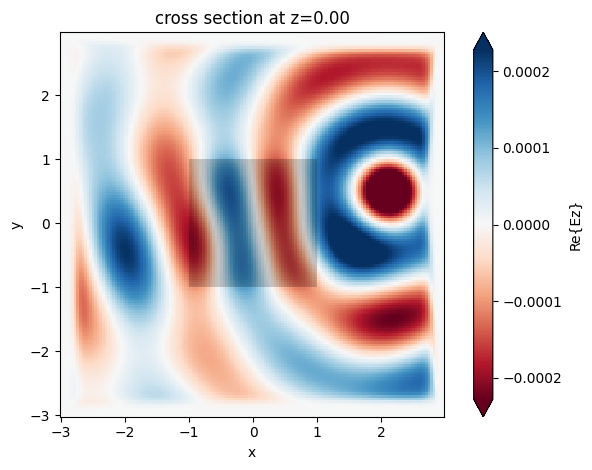

In [11]:
ax = sim_data_adj.plot_field(field_monitor_name='field', field_name='Ez', val='real')
plt.savefig('img/sim_adj_fields.png')
plt.show()

## Computing Gradient

Now that we have our forward and adjoint fields, we can multiply them together to get a map of how the change in permittivity at each point will affect our objective function.

In [12]:
e_fwd = sim_data['field'].Ez
e_adj = sim_data_adj['field'].Ez

k0 = 2 * np.pi / wavelength

eps_map = 4 * dl * dl * k0 ** 2 * (e_fwd * e_adj).real

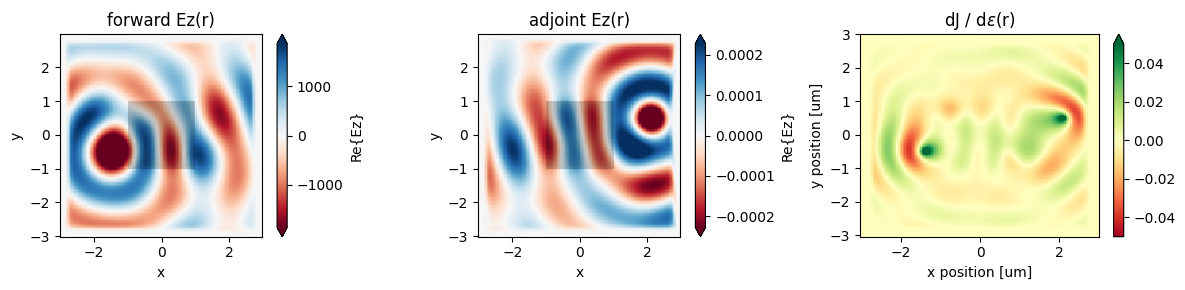

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3), tight_layout=True)
sim_data.plot_field(field_monitor_name='field', field_name='Ez', val='real', ax=ax1)
sim_data_adj.plot_field(field_monitor_name='field', field_name='Ez', val='real', ax=ax2)
eps_map.squeeze().plot.pcolormesh(x='x', y='y', ax=ax3, cmap="RdYlGn", vmin=-0.05, vmax=0.05)

ax1.set_title('forward Ez(r)')
ax2.set_title('adjoint Ez(r)')

ax3.set_title('dJ / d$\epsilon$(r)')
plt.savefig('img/three_fields.png')
plt.show()

## Comparison Against Numerical Derivative

To test our implementation, let's imagine our box was made up of four quadrants, each with their own individual permittivities $\epsilon_i$.

We will see how the adjoint gradient compares to one computed with finite difference.

Let's first set up our boxes.

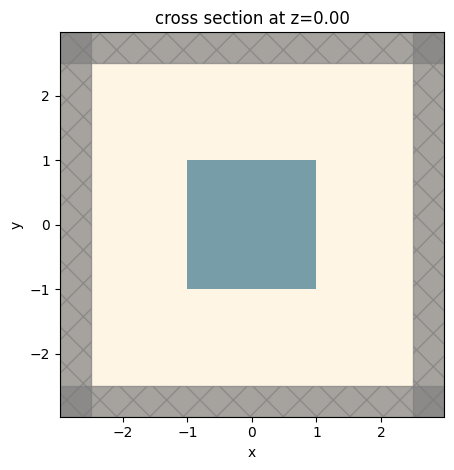

In [14]:
boxes = []

for x_center in (-lx/4, +lx/4):
    for y_center in (-ly/4, +ly/4):
        box = td.Structure(
            geometry=td.Box(
                center=(x_center, y_center, 0),
                size=(lx/2, ly/2, td.inf)
            ),
            medium=td.Medium(permittivity=eps_box),
        )
        boxes.append(box)

sim_num = sim.updated_copy(structures=boxes)

ax = sim_num.plot(z=0, monitor_alpha=0.1)

### Numerical Gradient

As a reminder, the numerical derivative with respect to parameter `p` is approximated by

$$
\frac{dJ}{dp} \approx \frac{J(p+\Delta) - J(p-\Delta)}{2 \Delta}
$$

Here, we will compute this for each $p$ in our design variables. 

We must loop over each of our box quadrants, perturb the permittivity in that quadrant by a small amount in both plus and minus directions, compute the objective function through a simulation, and take the difference. 

This will require 2 N = 8 simulations total, which we'll perform in a batch since they don't depend on each other.


In [15]:
# step size
delta = 5e-3

# set up all simulations in the batch with perturbed permittivities
num_grad_sims = {}
for i_box in range(len(boxes)):
    
    for pm_str, delta_eps in zip('+-', (+delta, -delta)):

        task_name = f'box_{i_box+1}_{pm_str}'
        new_boxes = list(boxes)
        new_medium = boxes[i_box].medium
        new_medium = new_medium.updated_copy(permittivity=new_medium.permittivity + delta_eps)
        new_boxes[i_box] = boxes[i_box].updated_copy(medium=new_medium)
        
        print(f'task_name = "{task_name}": box epsilons = {[b.medium.permittivity for b in new_boxes]}')
        
        new_sim_i = sim.updated_copy(structures=new_boxes)
        
        num_grad_sims[task_name] = new_sim_i

task_name = "box_1_+": box epsilons = [2.005, 2.0, 2.0, 2.0]
task_name = "box_1_-": box epsilons = [1.995, 2.0, 2.0, 2.0]
task_name = "box_2_+": box epsilons = [2.0, 2.005, 2.0, 2.0]
task_name = "box_2_-": box epsilons = [2.0, 1.995, 2.0, 2.0]
task_name = "box_3_+": box epsilons = [2.0, 2.0, 2.005, 2.0]
task_name = "box_3_-": box epsilons = [2.0, 2.0, 1.995, 2.0]
task_name = "box_4_+": box epsilons = [2.0, 2.0, 2.0, 2.005]
task_name = "box_4_-": box epsilons = [2.0, 2.0, 2.0, 1.995]


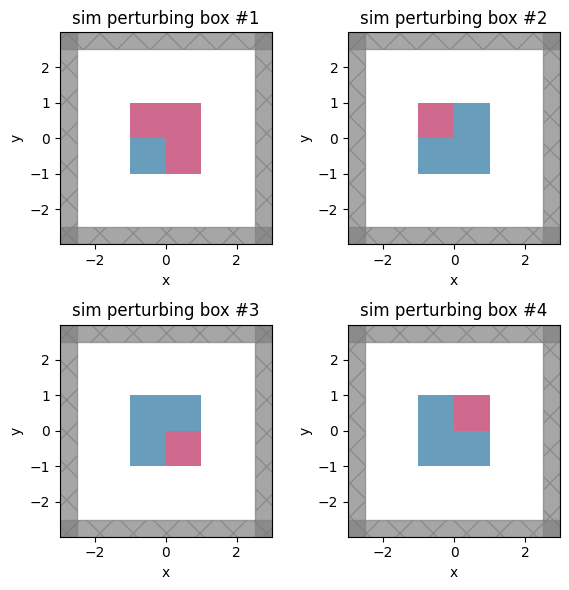

In [16]:
# inspect each of the forward perturbed sims to get a feeling for what is being simulated
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, tight_layout=True, figsize=(6, 6))
axes = [ax1, ax2, ax3, ax4]
for ax, box_num in zip(axes, '1234'):
    ax = num_grad_sims[f'box_{box_num}_+'].plot(z=0, monitor_alpha=0.0, ax=ax)
    ax.set_title(f'sim perturbing box #{box_num}')

In [17]:
# run all simulations in batch
batch_data = web.run_async(simulations=num_grad_sims, path_dir='data')

[11:24:59] Created task 'box_1_+' with task_id 'fdve-a3cbce76-60ed-4767-afc7-62252703262av1'.         ]8;id=427535;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=626672;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=585249;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=239516;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=388428;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=329863;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\taskId]8;;\]8;id=388428;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\=]8;;\]8;id=872670;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\fdve]8;;\]8;id=388428;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\-a3cbce76-60ed-4767-afc7-62252703262]8;;\              
           ]8;id=388428;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a3cbce76-60ed-4767-afc7-62252703262av1\av1']8;;\.                                                                                                   

Output()

[11:25:00] Created task 'box_1_-' with task_id 'fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1'.         ]8;id=801554;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=575895;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=543961;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=294939;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=301682;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=530017;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\taskId]8;;\]8;id=301682;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\=]8;;\]8;id=42427;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\fdve]8;;\]8;id=301682;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\-3ef1a853-e0fb-4df7-92e1-e4279a1a4bd]8;;\              
           ]8;id=301682;https://tidy3d.simulation.cloud/workbench?taskId=fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1\av1']8;;\.                                                                                                   

Output()

[11:25:01] Created task 'box_2_+' with task_id 'fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1'.         ]8;id=830413;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=786928;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=863328;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=330139;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=981582;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=824035;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\taskId]8;;\]8;id=981582;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\=]8;;\]8;id=167900;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\fdve]8;;\]8;id=981582;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\-ff5c4e18-c8e9-4937-aa79-ffada6801a0]8;;\              
           ]8;id=981582;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1\9v1']8;;\.                                                                                                   

Output()

[11:25:02] Created task 'box_2_-' with task_id 'fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1'.         ]8;id=666355;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=117668;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=581132;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=529758;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=323030;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=253496;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\taskId]8;;\]8;id=323030;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\=]8;;\]8;id=476756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\fdve]8;;\]8;id=323030;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\-2be47ebc-3fb9-48eb-a204-8b44d2d1fab]8;;\              
           ]8;id=323030;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1\cv1']8;;\.                                                                                                   

Output()

[11:25:03] Created task 'box_3_+' with task_id 'fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1'.         ]8;id=60812;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=777987;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=466234;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=682234;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=367114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=237677;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\taskId]8;;\]8;id=367114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\=]8;;\]8;id=322640;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\fdve]8;;\]8;id=367114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\-482e525d-a36e-4ffa-9b8d-2f4ddca4f54]8;;\              
           ]8;id=367114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1\bv1']8;;\.                                                                                                   

Output()

[11:25:03] Created task 'box_3_-' with task_id 'fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1'.         ]8;id=439656;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=933939;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=643102;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=377067;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=126782;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=876057;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\taskId]8;;\]8;id=126782;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\=]8;;\]8;id=217135;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\fdve]8;;\]8;id=126782;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\-c33e587e-a7e4-41ae-a67c-110f97c84dc]8;;\              
           ]8;id=126782;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1\4v1']8;;\.                                                                                                   

Output()

[11:25:04] Created task 'box_4_+' with task_id 'fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1'.         ]8;id=344377;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=396252;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=130364;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=301385;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=342853;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=423180;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\taskId]8;;\]8;id=342853;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\=]8;;\]8;id=378868;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\fdve]8;;\]8;id=342853;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\-8c06ba75-5423-4675-99f7-fd23d57b56c]8;;\              
           ]8;id=342853;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1\0v1']8;;\.                                                                                                   

Output()

[11:25:05] Created task 'box_4_-' with task_id 'fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1'.         ]8;id=485297;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=99738;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#187\187]8;;\

           View task using web UI at                                                                  ]8;id=418832;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=251816;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#189\189]8;;\
           ]8;id=426175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=310967;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\taskId]8;;\]8;id=426175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\=]8;;\]8;id=188120;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\fdve]8;;\]8;id=426175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\-49918a3f-410f-4099-9e92-ec2c94e1a27]8;;\              
           ]8;id=426175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1\9v1']8;;\.                                                                                                   

Output()

[11:25:10] Started working on Batch.                                                               ]8;id=745942;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/container.py\container.py]8;;\:]8;id=932492;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/container.py#457\457]8;;\

Output()

[11:26:19] Batch complete.                                                                         ]8;id=540519;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/container.py\container.py]8;;\:]8;id=288547;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/container.py#497\497]8;;\

In [18]:
# post process batch results using finite difference derivative equation to compute gradient
grad_num = np.zeros((len(boxes)))
for task_name, sim_data in batch_data.items():
    _, box_i_plus1, pm_str = task_name.split('_')
    box_i = int(box_i_plus1) - 1
    constant = 1/(2 * delta) if pm_str == "+" else -1/(2 * delta)
    J_i = measure_intensity(sim_data)
    grad_num[box_i] += constant * J_i


Output()

[11:26:21] loading SimulationData from data/fdve-a3cbce76-60ed-4767-afc7-62252703262av1.hdf5          ]8;id=43756;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=277452;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:22] loading SimulationData from data/fdve-3ef1a853-e0fb-4df7-92e1-e4279a1a4bdav1.hdf5          ]8;id=751573;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=836162;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:23] loading SimulationData from data/fdve-ff5c4e18-c8e9-4937-aa79-ffada6801a09v1.hdf5          ]8;id=564513;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=793859;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:24] loading SimulationData from data/fdve-2be47ebc-3fb9-48eb-a204-8b44d2d1fabcv1.hdf5          ]8;id=784408;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=994526;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:25] loading SimulationData from data/fdve-482e525d-a36e-4ffa-9b8d-2f4ddca4f54bv1.hdf5          ]8;id=790864;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=825674;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:26] loading SimulationData from data/fdve-c33e587e-a7e4-41ae-a67c-110f97c84dc4v1.hdf5          ]8;id=458716;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=939483;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:27] loading SimulationData from data/fdve-8c06ba75-5423-4675-99f7-fd23d57b56c0v1.hdf5          ]8;id=420606;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=124975;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

Output()

[11:26:28] loading SimulationData from data/fdve-49918a3f-410f-4099-9e92-ec2c94e1a279v1.hdf5          ]8;id=390552;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=792222;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#569\569]8;;\

### Adjoint Gradient

For the adjoint gradient, we simply sum our permittivity derivative map over each of the domains associated with the permittivities. 

Note, the neat thing about this is that we **only require 2 simulations** to compute the gradient, no matter how many design parameters we have.

The permittivity derivative matp contains all the information we need to compute the gradient w.r.t. a set of arbitrary parameters.


In [19]:
grad_adj = []

num_pts = 100

# loop over quadrants and integrate using trapezoidal rule
for x_center in (-lx/4, +lx/4):
    dx = lx/2/num_pts
    x_bounds = (x_center - lx/4, x_center + lx/4)
    xpts = np.linspace(x_bounds[0] + dx/2, x_bounds[1] - dx/2, num_pts)
    for y_center in (-ly/4, +ly/4):
        dy = ly/2/num_pts
        y_bounds = (y_center - ly/4, y_center + ly/4)
        ypts = np.linspace(y_bounds[0] + dy/2, y_bounds[1] - dy/2, num_pts)
        grad_adj_i = np.sum(eps_map.interp(x=xpts, y=ypts)) * dx * dy
        grad_adj.append(grad_adj_i)        

grad_adj = np.array(grad_adj)

In [20]:
print('adjoint gradient = ', grad_adj)
print('numerical gradient = ', grad_num)

adjoint gradient =  [ 0.00441784 -0.00192454  0.00454513 -0.00041604]
numerical gradient =  [ 0.00440619 -0.00193145  0.00454112 -0.00042815]


We compare the two gradients and see that match quite well! to 0.15% RMS error.

In [21]:
rms_unnormalized = np.linalg.norm(grad_adj - grad_num) / np.linalg.norm(grad_num)
print(f'rms unnormalized = {(rms_unnormalized * 100):.4f} %')

rms unnormalized = 0.2806 %


For the purposes of optimization, we often care more about the **direction** of the gradient vector than it's overall magnitude.

This is because most optimization algorithms require the user to specify a step size for iteration anyway.

In this spirit, comparing the adjoint and numerical gradient vectors normalized as unit vectors, the error gets even smaller.

In [22]:
rms_normalized = np.linalg.norm(grad_adj / np.linalg.norm(grad_adj) - grad_num / np.linalg.norm(grad_num))
print(f'rms normalized = {(rms_normalized * 100):.4f} %')

rms normalized = 0.2552 %


This is a typical approach towards checking that your adjoint code is working properly.

In the following notebooks, we will make use of the `adjoint` plugin in tidy3d to compute these gradients without all of this extra work, and use it to do some interesting optimizations.

In [23]:
src_adj

PointDipole(type='PointDipole', center=(2.1, 0.5, 0.0), size=(0, 0, 0), source_time=GaussianPulse(amplitude=1.4102874969705147e-07, phase=6.9936180213814865, type='GaussianPulse', freq0=149896229000000.0, fwidth=14989622900000.0, offset=5.0), name=None, polarization='Ez', interpolate=True)

In [25]:
np.angle(forward_amp)

-2.2812290409967972

In [26]:
3 * np.pi / 2 - np.angle(forward_amp)

6.9936180213814865

PointDipole(type='PointDipole', center=(2.1, 0.5, 0.0), size=(0, 0, 0), source_time=GaussianPulse(amplitude=1.1282299534577141e-08, phase=2.431159933347032, type='GaussianPulse', freq0=149896229000000.0, fwidth=14989622900000.0, offset=5.0), name=None, polarization='Ez', interpolate=True)